Processing file: ASM/Rot_ASM_LhT2.mat
Reshaped EEG data to shape: (14, 4278)
Creating RawArray with float64 data, n_channels=14, n_times=4278
    Range : 0 ... 4277 =      0.000 ...    33.414 secs
Ready.

Creating topographic map...


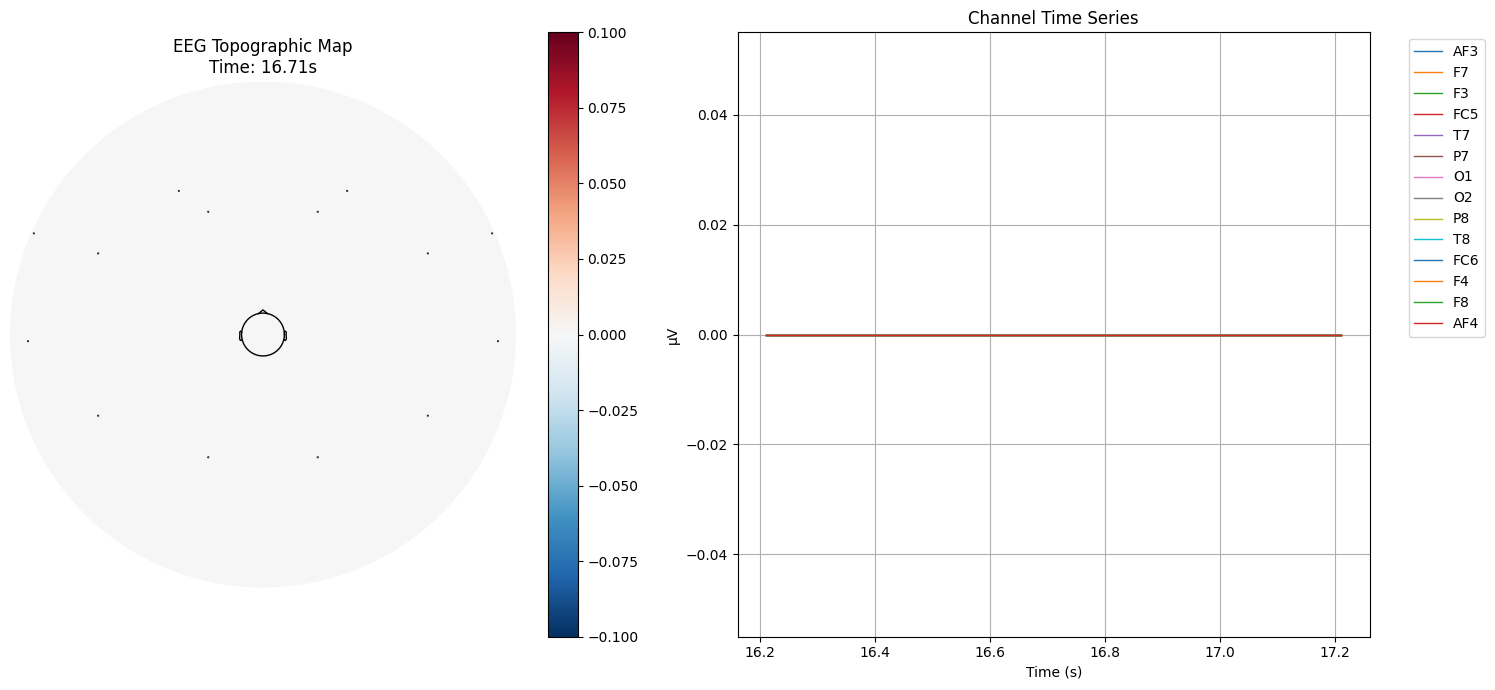


Creating animated topography...

Saved 6 topographic maps in 'topo_maps' directory


In [5]:
def create_topographic_map(raw, time_point=None, window_size=1.0):
    """Create topographic map of EEG data"""
    if time_point is None:
        # Use the middle of the recording if no time point specified
        time_point = raw.times[len(raw.times)//2]
    
    # Create time window around the point of interest
    start = max(time_point - window_size/2, raw.times[0])
    stop = min(time_point + window_size/2, raw.times[-1])
    
    # Convert time to samples
    start_idx = int(start * raw.info['sfreq'])
    stop_idx = int(stop * raw.info['sfreq'])
    
    # Get data for the time window
    data = raw.get_data(start=start_idx, stop=stop_idx)
    data_mean = data.mean(axis=1)
    
    # Create figure with two subplots: topomap and time series
    fig = plt.figure(figsize=(15, 7))
    
    # Topographic map
    ax1 = plt.subplot(121)
    im = mne.viz.plot_topomap(data_mean, raw.info, axes=ax1, show=False,
                             cmap='RdBu_r', sensors=True, contours=6,
                             outlines='head')
    plt.colorbar(im[0], ax=ax1)
    ax1.set_title(f'EEG Topographic Map\nTime: {time_point:.2f}s')
    
    # Time series plot
    ax2 = plt.subplot(122)
    times = np.linspace(start, stop, stop_idx - start_idx)
    for i, channel in enumerate(raw.ch_names):
        ax2.plot(times, data[i, :], label=channel, linewidth=1)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('µV')
    ax2.set_title('Channel Time Series')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig

def create_animated_topography(raw, start_time=0, end_time=None, step=0.1):
    """Create series of topographic maps over time"""
    if end_time is None:
        end_time = raw.times[-1]
    
    time_points = np.arange(start_time, end_time, step)
    figs = []
    
    for t in time_points:
        try:
            fig = create_topographic_map(raw, time_point=t)
            figs.append(fig)
            plt.close(fig)
        except Exception as e:
            print(f"Error creating map at time {t}: {str(e)}")
            continue
    
    return figs

# Example usage with error handling
if __name__ == "__main__":
    import os
    file_path = "ASM/Rot_ASM_LhT2.mat"
    
    try:
        # Process the data
        raw = process_eeg_data(file_path)
        
        print("\nCreating topographic map...")
        # Create and show single topographic map
        time_point = raw.times[len(raw.times)//2]  # middle of recording
        fig = create_topographic_map(raw, time_point=time_point)
        
        # Create output directory if it doesn't exist
        if not os.path.exists('topo_maps'):
            os.makedirs('topo_maps')
        
        # Save static map
        fig.savefig('topo_maps/topographic_map_static.png')
        plt.show()
        
        print("\nCreating animated topography...")
        # Create series of maps (one per second for the first 5 seconds)
        figs = create_animated_topography(raw, start_time=0, end_time=5, step=1.0)
        
        # Save animated sequence
        for i, fig in enumerate(figs):
            fig.savefig(f'topo_maps/topographic_map_{i:03d}.png')
            
        print(f"\nSaved {len(figs) + 1} topographic maps in 'topo_maps' directory")
        
    except Exception as e:
        print(f"Error processing file: {str(e)}")
        import traceback
        traceback.print_exc()

In [3]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

def inspect_data_structure(file_path):
    """Inspect the data structure in detail"""
    # Load MATLAB data
    print(f"\nInspecting file: {file_path}")
    mat_data = loadmat(file_path)
    data = mat_data['Data'][0, 0]
    
    # Get EEG data
    eeg_data = data['EEG'][0,0]
    print("\nEEG data structure:")
    print(f"Type: {type(eeg_data)}")
    print(f"Shape: {eeg_data.shape}")
    print(f"Fields: {eeg_data.dtype.names}")
    
    # Inspect raw data
    raw_data = eeg_data['raw'][0,0]
    print("\nRaw data structure:")
    print(f"Type: {type(raw_data)}")
    print(f"Shape: {raw_data.shape}")
    print(f"Fields: {raw_data.dtype.names}")
    
    # Inspect value field
    value_data = raw_data['value']
    print("\nValue field structure:")
    print(f"Type: {type(value_data)}")
    print(f"Shape: {value_data.shape}")
    if isinstance(value_data, np.ndarray):
        print(f"Dtype: {value_data.dtype}")
        if value_data.size > 0:
            first_element = value_data[0,0] if value_data.shape[0] == 1 else value_data[0]
            print(f"First element type: {type(first_element)}")
            print(f"First element shape: {getattr(first_element, 'shape', 'No shape')}")
            if isinstance(first_element, np.ndarray):
                print(f"First element first few values: {first_element[:5]}")
    
    # Inspect time field
    time_data = raw_data['time']
    print("\nTime field structure:")
    print(f"Type: {type(time_data)}")
    print(f"Shape: {time_data.shape}")
    if isinstance(time_data, np.ndarray):
        print(f"Dtype: {time_data.dtype}")
        if time_data.size > 0:
            first_element = time_data[0,0] if time_data.shape[0] == 1 else time_data[0]
            print(f"First element type: {type(first_element)}")
            print(f"First element shape: {getattr(first_element, 'shape', 'No shape')}")

# Run the inspection
if __name__ == "__main__":
    file_path = "ASM/Rot_ASM_LhT2.mat"
    inspect_data_structure(file_path)


Inspecting file: ASM/Rot_ASM_LhT2.mat

EEG data structure:
Type: <class 'numpy.void'>
Shape: ()
Fields: ('raw', 'attention', 'meditation', 'PQ')

Raw data structure:
Type: <class 'numpy.void'>
Shape: ()
Fields: ('value', 'time')

Value field structure:
Type: <class 'numpy.ndarray'>
Shape: (1, 59904)
Dtype: int16
First element type: <class 'numpy.int16'>
First element shape: ()

Time field structure:
Type: <class 'numpy.ndarray'>
Shape: (1, 59904)
Dtype: object
First element type: <class 'numpy.ndarray'>
First element shape: (1, 1)
